Let us consider the unconstrained optimization problem of minimizing the function $f_0(x) = x^4-4x^3-6x^2+200$ defined as

$$ \min_{x \in \mathbb{R}} f_0(x) $$

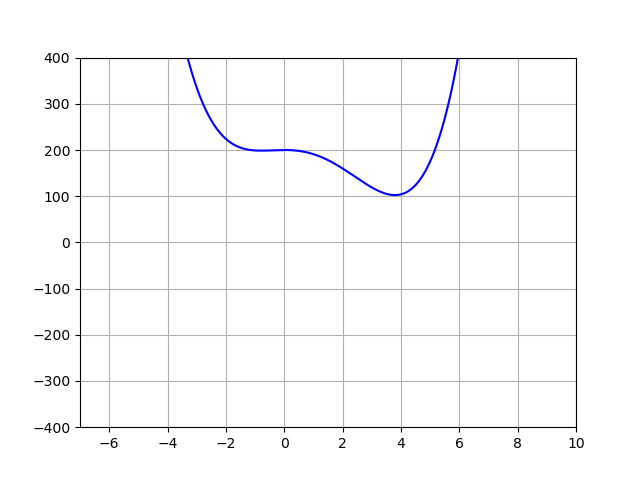

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def f_0(x):
    return x**4-4*x**3-6*x**2+200


x = np.linspace(-4, 10, 1000)

fig, ax = plt.subplots()
ax.set_xlim(-7, 10)
ax.set_ylim(-400, 400)
plt.grid(True)

ax.plot(x, f_0(x), color="blue", label="$f_0(x)$")

let us subject the minimization problem above to simple inequality constraints that restrict its feasibility as:

$$ \min_{x \in \mathbb{R}} f_0(x) $$
$$\text{s. t.} \quad f_1(x) =(10(x-2))^2- 400 \leq 0 $$


and plot the feasibility region

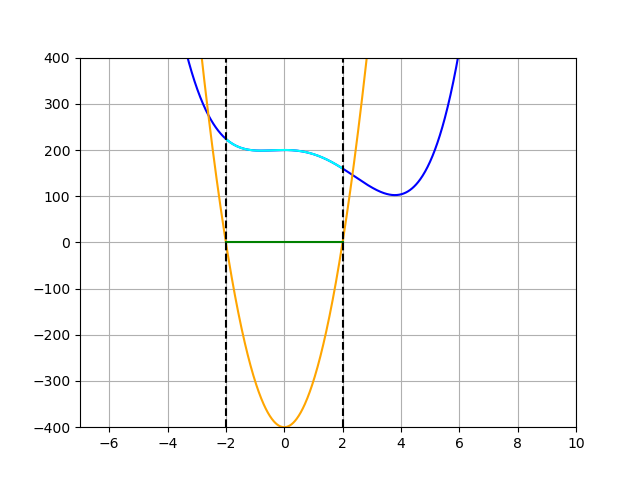

In [2]:
def f_1(x):
    return (10*x)**2-400
plt.grid(True)
ax.plot(x, f_1(x), color="orange", label="$f_1(x)$")
roots = np.roots([100, 0, -400])
feasibility_region = np.linspace(roots[0], roots[1], 100)
ax.plot(feasibility_region, np.zeros(len(feasibility_region)), color='green', label='feasible region')
ax.plot(feasibility_region, f_0(feasibility_region), color='cyan', label='feasible region')
for i in range(len(roots)):
    ax.axvline(x=roots[i], color='black', linestyle='--', label='root at x=%0.2f'%roots[i])

plt.show()

In the feasible region, we minimize the function using cvxpy and plot the minima of this function

Note that we do not know yet whether the polynomial is convex or not.

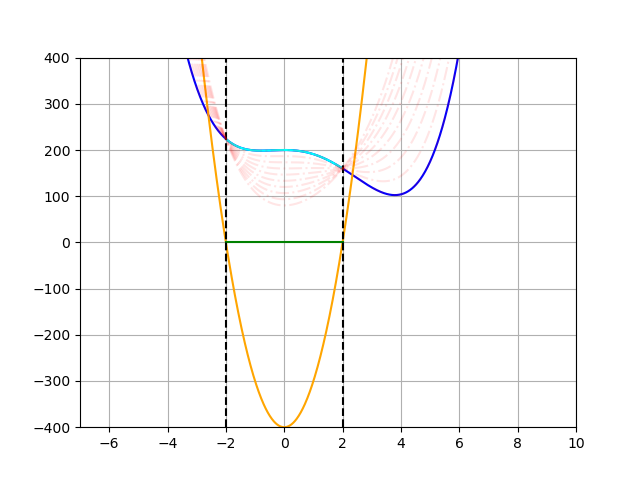

In [3]:
#composing the lagrangian
def L_f_0(f_0, f_1, x, lambda_1):
    return f_0(x) + lambda_1*f_1(x)

# plotting the lagrangian dual function for different values of lambda_1
lambda_1 = np.linspace(0,0.3,10)
lambda_2 = np.linspace(0,0.3,1000)
for i in range(len(lambda_1)):
    ax.plot(x, L_f_0(f_0, f_1, x, lambda_1[i]), color='red', linestyle="-.", alpha=0.1)

plt.show()

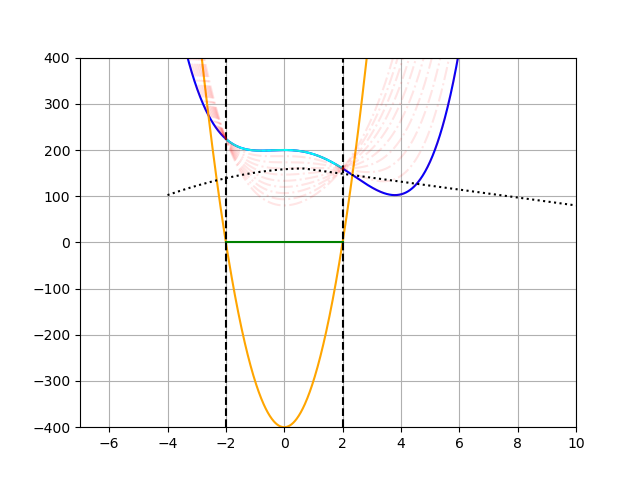

In [4]:
g_lambda = np.zeros(len(lambda_2))

for j in range(len(lambda_2)):
    l_vals = [L_f_0(f_0, f_1, x[i], lambda_2[j]) for i in range(len(x))]
    g_lambda[j] = np.min(l_vals)

# plotting the lagrangian dual function for different values of lambda_1
ax.plot(x, g_lambda, color='black', linestyle='dotted')
plt.show()